In [ ]:
!unzip -q /content/my_library_final.zip -d /content/

#Section 1
## Gradiant check ( Analytical vs Numerical):
For numerical the formula is: ∂L/∂W ≈ [L(W + ε) - L(W - ε)]/(2ε)








 i will test the weights of network, also the implementation of the backpropagation in our code.


In [ ]:
import sys
import numpy as np
from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential , Tanh
x=np.array([[1,-1],[-1,-1],[1,1],[-1,1]])
y=np.array([[1],[0],[1],[0]])

test_layer = Dense(2,1,activation=Tanh())

## analytical gradient
model=Sequential([test_layer])
loss_fn = MSE()    ##   (soft max) طلاما مستخدمتش
out= model.forward(x)
loss=loss_fn.forward(out,y)

dA=loss_fn.backward()
model.backward(dA)
grad_analytical= test_layer.dW



## numerical gradient

rows, cols = test_layer.W.shape
epsilon= 1e-7


for i in range(rows):
        for j in range(cols):

            # أ) احتفظ بالوزن الأصلي عشان نرجعه تاني
            original_weight = test_layer.W[i, j]

            test_layer.W[i, j] = original_weight + epsilon
            output_plus = test_layer.forward(x)
            loss_plus = loss_fn.forward(output_plus, y)


            test_layer.W[i, j] = original_weight - epsilon
            output_minus = test_layer.forward(x)
            loss_minus = loss_fn.forward(output_minus, y)


            numerical_grad = (loss_plus - loss_minus) / (2 * epsilon)
            my_grad = grad_analytical[i, j]

            print(f"Analytical Gradient: {grad_analytical[i, j]}")
            print(f"Numerical Gradient: {numerical_grad}")

            #  رجع الوزن لأصلي
            test_layer.W[i, j] = original_weight

            # بنحسب الفرق النسبي عشان لو الأرقام صغيرة جداً
            numerator = abs(my_grad - numerical_grad)
            denominator = max(abs(my_grad), abs(numerical_grad)) + epsilon
            relative_error = numerator / denominator
            print(f"Relative Error: {relative_error}")
            print("")
            print("")
            print("")










Analytical Gradient: -1.0307772654305505
Numerical Gradient: -1.0307772668749493
Relative Error: 1.4012713794335076e-09



Analytical Gradient: 0.04833560619331459
Numerical Gradient: 0.048335605518090574
Relative Error: 1.3969466234524251e-08





# Section 2

**user choices:**


1st layer i/ps: 2

1st layer o/ps: 4


---


2nd layer i/ps: 4

2nd layer o/ps: 1



---
activation function : sigmoid, for both layers.


---



**learning rate**: 1



---

no. of iterations : 10000




---


In [ ]:
  import sys
  import numpy as np
  from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential , Tanh
  # XOR dataset
  X = np.array([[0,0],[0,1],[1,0],[1,1]])
  y = np.array([[0],[1],[1],[0]])

  # Create tiny network: 2 inputs -> 2 hidden -> 1 output
  layers = [              ##    لسته عادي خالص
      Dense(2, 4, activation=Sigmoid()),
      Dense(4, 1, activation=Sigmoid())
  ]
  #intialize network
  model = Sequential(layers)
  loss_fn = MSE()    ##   (soft max) طلاما مستخدمتش
  optimizer = SGD(lr=1)

  # Training loop (just a few epochs)
  for epoch in range(10000):
      # Forward
      out = model.forward(X)
      loss = loss_fn.forward(out, y)

      # Backward
      dA = loss_fn.backward()
      model.backward(dA)

      # Update weights
      for layer in layers:
          optimizer.step(layer)

      if epoch % 1000 == 0:
          print(f"Epoch {epoch}, loss={loss}")

  # Test predictions
  pred = model.forward((10,9))
  print("Predictions:\n", pred)


Epoch 0, loss=0.2821308145421968
Epoch 1000, loss=0.011341044113340203
Epoch 2000, loss=0.0027636381761677927
Epoch 3000, loss=0.001527758107844487
Epoch 4000, loss=0.0010480747080908526
Epoch 5000, loss=0.0007951022748237728
Epoch 6000, loss=0.0006393704084729933
Epoch 7000, loss=0.000534047650258871
Epoch 8000, loss=0.00045815604652052705
Epoch 9000, loss=0.0004009161385792341
Predictions:
 [[0.0181042]]


#**Section 3**


**load** the model

In [ ]:
import sys
import os
import pickle
import numpy as np
from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential ,ReLU
save_dir = '/content/drive/MyDrive/My_DL_Project_Saves'


def load_checkpoint(filename='best_autoencoder_v1.pkl'):
    # نكون المسار الكامل
    full_path = os.path.join(save_dir, filename)

    if not os.path.exists(full_path):
        print(f"❌ Error: File not found at {full_path}")
        return None, None

    with open(full_path, 'rb') as f:
        checkpoint = pickle.load(f)

    model = checkpoint['model_state']
    history = checkpoint['training_history']

    print("✅ Checkpoint Loaded Successfully!")
    return model, history

# 3. الاستخدام
# تأكد إن اسم الملف هنا هو نفس الاسم اللي حفظت بيه
autoencoder, history = load_checkpoint('best_autoencoder_v1.pkl')

✅ Checkpoint Loaded Successfully!


**get dataset**


In [ ]:
from my_library_final.load_data import load_mnist_manual
(x_train, y_train), (x_test, y_test),(x_val, y_val) = load_mnist_manual()
print(len(x_test))
print(len(x_train))
print(len(x_val))




10000
54000
6000


# Autoencoder Implementation:


In [ ]:
import sys
import numpy as np
from my_library_final import Dense, Sigmoid, MSE, SGD, Sequential ,ReLU

#data set
X = x_train
y = x_train
val_X= x_val
val_y = x_val

#network
layers = [              ##    لسته عادي خالص
       #encoder
      Dense(784, 256, activation=ReLU()),
      Dense(256, 64, activation=ReLU()),


       #decoder
      Dense(64, 256, activation=ReLU()),
      Dense(256, 784, activation=Sigmoid()),
  ]
  #intialize network
autoencoder = Sequential(layers)
loss_fn = MSE()
optimizer = SGD(lr=1)
batch_size = 8
epochs=30


In [ ]:
from my_library_final.train import train
history=train(autoencoder, loss_fn, optimizer, X, y,val_X,val_y ,epochs=epochs, batch_size=batch_size)

Epoch 1/30 | Train Loss: 0.034656 | Val Loss: 0.019198 🏆 (Saved)
Epoch 2/30 | Train Loss: 0.016013 | Val Loss: 0.013751 🏆 (Saved)
Epoch 3/30 | Train Loss: 0.012353 | Val Loss: 0.011367 🏆 (Saved)
Epoch 4/30 | Train Loss: 0.010638 | Val Loss: 0.010326 🏆 (Saved)
Epoch 5/30 | Train Loss: 0.009719 | Val Loss: 0.009487 🏆 (Saved)
Epoch 6/30 | Train Loss: 0.009144 | Val Loss: 0.008983 🏆 (Saved)
Epoch 7/30 | Train Loss: 0.008793 | Val Loss: 0.008738 🏆 (Saved)
Epoch 8/30 | Train Loss: 0.008523 | Val Loss: 0.008507 🏆 (Saved)
Epoch 9/30 | Train Loss: 0.008292 | Val Loss: 0.008218 🏆 (Saved)
Epoch 10/30 | Train Loss: 0.008116 | Val Loss: 0.008110 🏆 (Saved)
Epoch 11/30 | Train Loss: 0.007971 | Val Loss: 0.007950 🏆 (Saved)
Epoch 12/30 | Train Loss: 0.007834 | Val Loss: 0.007883 🏆 (Saved)
Epoch 13/30 | Train Loss: 0.007704 | Val Loss: 0.007735 🏆 (Saved)
Epoch 14/30 | Train Loss: 0.007569 | Val Loss: 0.007624 🏆 (Saved)
Epoch 15/30 | Train Loss: 0.007431 | Val Loss: 0.007410 🏆 (Saved)
Epoch 16/30 | Train

**loss of training and validation**

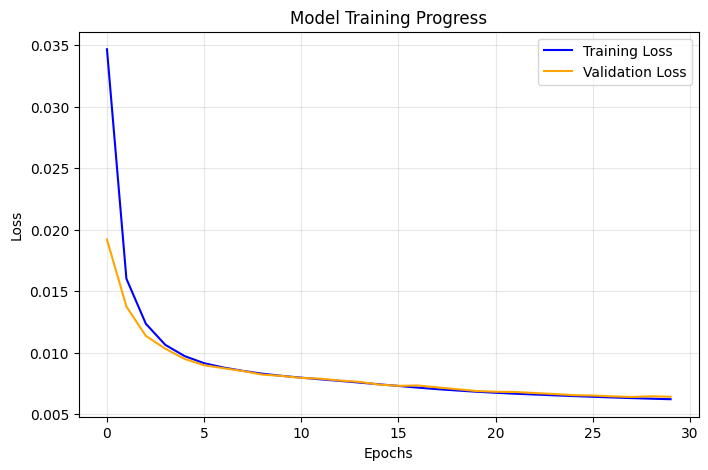

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 5))

    if isinstance(history, dict):
        plt.plot(history['train_loss'], label='Training Loss', color='blue')
        if 'val_loss' in history:
            plt.plot(history['val_loss'], label='Validation Loss', color='orange')
        plt.legend()
    else:
        plt.plot(history, label='Training Loss', color='blue')

    plt.title('Model Training Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.show()


plot_loss(history)

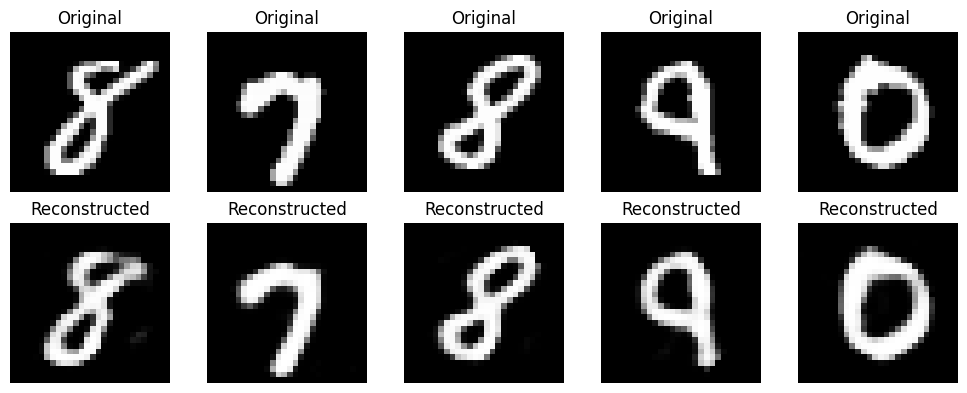

In [ ]:
import numpy as np

def show_reconstruction(model, x_test, n=5):
    indices = np.random.randint(0, len(x_test), n)
    original_images = x_test[indices]

    reconstructed_images = model.forward(original_images)

    # 3. الرسم
    plt.figure(figsize=(10, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')


        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


show_reconstruction(autoencoder, x_test)

**save the model**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/My_DL_Project_Saves'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"✅ Created folder: {save_dir}")
else:
    print(f"✅ Folder exists: {save_dir}")

Mounted at /content/drive
✅ Created folder: /content/drive/MyDrive/My_DL_Project_Saves


In [ ]:
import pickle

def save_checkpoint(model, history, filename='full_training_checkpoint.pkl'):
    checkpoint = {
        'model_state': model,      # الموديل بأوزانه بكل حاجة
        'training_history': history, # اللوس والرسومات
        'epoch_count': len(history['train_loss'])
    }

    full_path = os.path.join(save_dir, filename)
    with open(full_path, 'wb') as f:
        pickle.dump(checkpoint, f)

    print(f"🎉 Saved Successfully to: {full_path}")
    print(f"   Contains: Model + History ({len(history['train_loss'])} epochs)")


#احفظ يزعيمممممم
save_checkpoint(autoencoder, history, 'best_autoencoder_v1.pkl')

NameError: name 'autoencoder' is not defined

##Section 4

# Feature Extraction:

**data set**

In [ ]:
x_classifir_train=x_train
y_classifir_train=y_train
x_classifir_test=x_test
y_classifir_test=y_test
x_classifir_val=x_val
y_classifir_val=y_val

**latent features**

In [ ]:
encoder_layers = autoencoder.layers[:2]
encoder = Sequential(encoder_layers)


print("🔄 Transforming images to Latent Features...")
z_train = encoder.forward(x_classifir_train)
z_test  = encoder.forward(x_classifir_test)
z_val   = encoder.forward(x_classifir_val)

print(f"✅ Transformation Done!")
print(f"New Feature Shape: {z_train.shape}")

🔄 Transforming images to Latent Features...
✅ Transformation Done!
New Feature Shape: (54000, 64)


#SVM Training:

In [ ]:
from sklearn.svm import SVC
import time
svm = SVC(kernel='rbf', C=10, gamma='scale')

print(" Starting SVM training with RBF kernel...")
start = time.time()

# 2. Fit the model
# .ravel() is used to ensure labels are 1D array (e.g., [1, 5, 3] not [[1], [5], [3]])
svm.fit(z_train, y_classifir_train.ravel())

end = time.time()
print(f" Training completed in {end - start:.2f} seconds.")


 Starting SVM training with RBF kernel...
 Training completed in 49.71 seconds.
 Predicting test set...


# Evaluation:

**SVM Classification Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

print(" Predicting test set...")
y_pred = svm.predict(z_test)
accuracy = accuracy_score(y_classifir_test, y_pred)
print(f"SVM Classification Accuracy: {accuracy * 100:.2f}%")

 Predicting test set...
SVM Classification Accuracy: 98.36%


 **Report test accuracy**

In [ ]:

print("\n📝 Classification Report:")
print(classification_report(y_classifir_test, y_pred))



📝 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**confusion matrix**

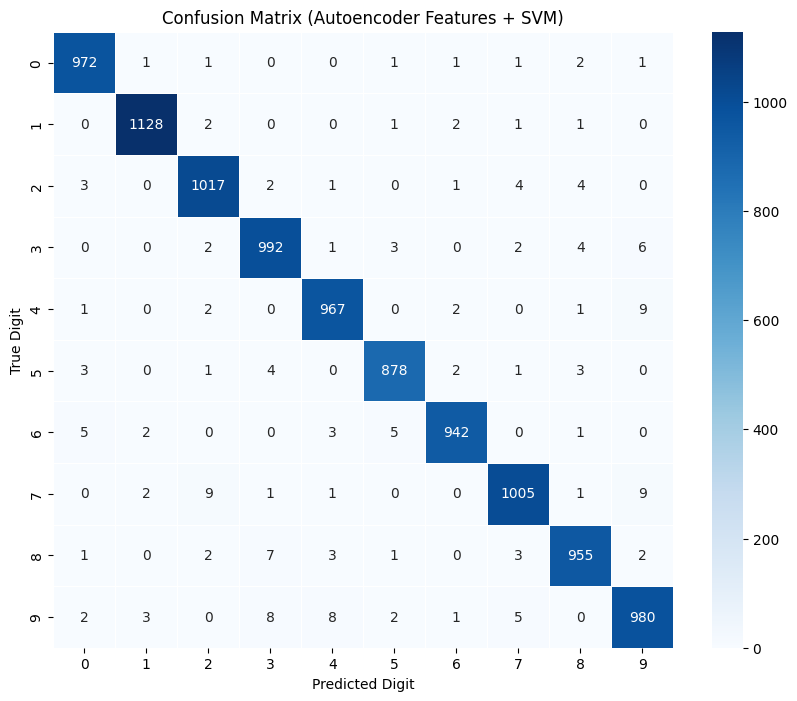

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_classifir_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix (Autoencoder Features + SVM)')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()

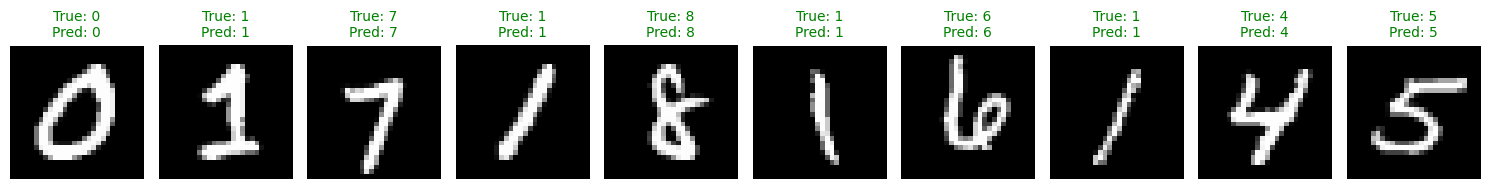

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_svm_predictions(encoder, svm_model, x_test, y_test, num_samples=10):

    indices = np.random.randint(0, len(x_test), num_samples)
    images = x_test[indices]
    true_labels = y_test[indices]


    latent_features = encoder.forward(images)


    predictions = svm_model.predict(latent_features)


    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        ax = plt.subplot(1, num_samples, i + 1)


        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        color = 'green' if predictions[i] == true_labels[i] else 'red'

        title = f"True: {true_labels[i]}\nPred: {predictions[i]}"
        ax.set_title(title, color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

visualize_svm_predictions(encoder, svm, x_test, y_classifir_test, num_samples=10)

##section 5

# Using tensorFlow with XOR

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predictions:
[[0.02875548]
 [0.936755  ]
 [0.9458372 ]
 [0.06684634]]


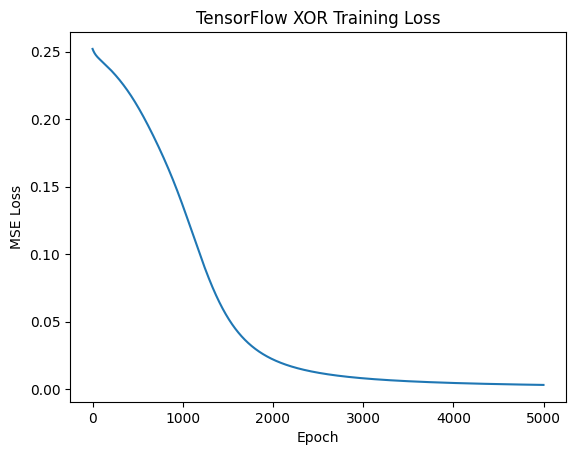

In [ ]:
#tensorflow for xor
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.075),
              loss='mse')

# Train
history = model.fit(X, y, epochs=5000, verbose=0)

# Predictions
preds = model.predict(X)
print("Predictions:")
print(preds)

# Plot loss curve
plt.plot(history.history['loss'])
plt.title("TensorFlow XOR Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


##Using tensorFlow with autoencoder

In [ ]:
import tensorflow as tf
import time

autoencoder_tf = tf.keras.Sequential([
    # Encoder
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # Decoder
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])
autoencoder_tf.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.5))

In [ ]:
print("\n--- Training Keras Autoencoder ---")
start_time = time.time()

# Use same batch_size and epochs as your library
history_ae = autoencoder_tf.fit(
    x_train, x_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, x_val),
    verbose=1
)

end_time = time.time()
ae_time = end_time - start_time

print(f"Training Time: {ae_time:.2f} seconds")
print(f"Final Train Loss: {history_ae.history['loss'][-1]:.6f}")
print(f"Final Val Loss: {history_ae.history['val_loss'][-1]:.6f}")


--- Training Keras Autoencoder ---
Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0407 - val_loss: 0.0379
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0372 - val_loss: 0.0344
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0340 - val_loss: 0.0314
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0310 - val_loss: 0.0288
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0285 - val_loss: 0.0267
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0267 - val_loss: 0.0250
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0248 - val_loss: 0.0236
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0235 - val_loss: 0.0223
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0223 - val_loss: 0.0212
Epoch 10/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0212 - val_loss: 0.0202
Epoch 11/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0202 - val_loss: 0.0194
Epoch 

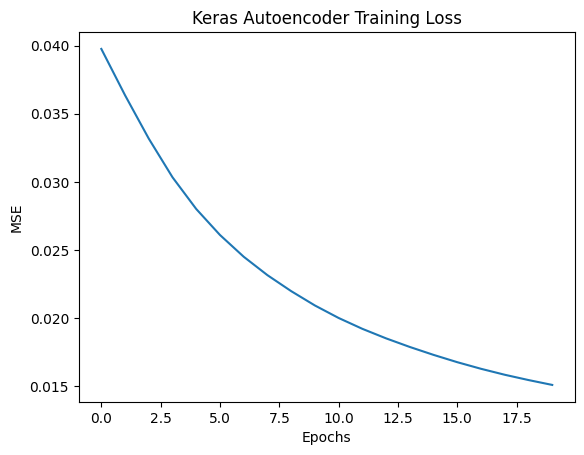

In [ ]:
plt.plot(history_ae .history['loss'])
plt.title('Keras Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()